In [1]:
%matplotlib inline
import tables as tb
import numpy as np
import pBLR as BLR
import matplotlib.pyplot as plt
import scipy as sc

In [2]:
f = tb.open_file("../../Shifts/data/merged.h5")

In [3]:
wfs = f.root.RD.sipmrwf[0]
wf = wfs[0]

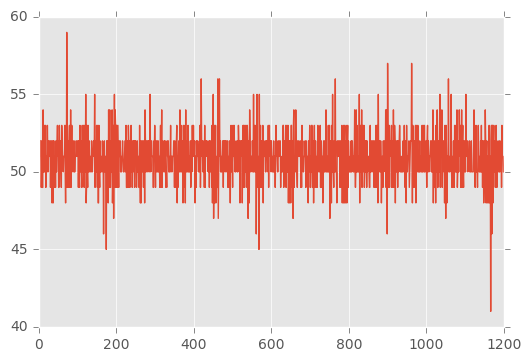

In [28]:
plt.plot(wfs[2])

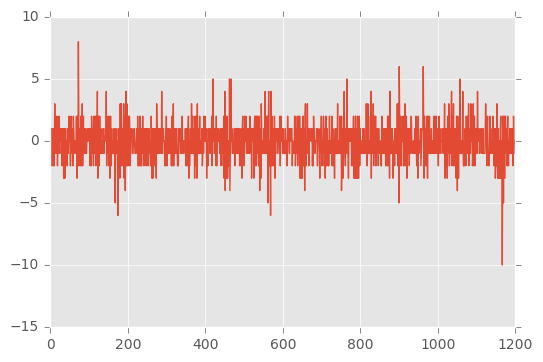

In [29]:
def subtract_baseline(wfs, mau_len = 100):
    """
    Computes the baseline for each SiPM in the event and subtracts it.
    For doing so, the first mau_len samples in the waveform are taken.
    """
    b_mau = np.ones(mau_len)*1.0/mau_len
    bls = map(lambda wf: sc.signal.lfilter(b_mau, 1, wf)[-1], wfs[:,:mau_len] )
    return wfs - np.array(bls).reshape(wfs.shape[0],1)

plt.plot(subtract_baseline(wfs, 120)[2])